<a href="https://colab.research.google.com/github/NihalPuram/Stock_Price_Model/blob/master/Stock_Project_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a program that uses basic "Linear Regression" and "Decision Tree Regression" to predict the stock price. We will use the better of the two models to predict the future stock price. I have run this using the Stock of Netflix (NFLX). You can change the ticker to run your own. I have used tiingo api to download the required data, all you have to do is login to tiingo api and get your api key and enter down below to be able to run it.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas_datareader as pdr
stock = "enter your stock ticker"
dataset = pdr.get_data_tiingo(stock,api_key='Enter your tiingo api-key here')
dataset.to_csv('DATA.csv')

Enter your stock ticker in the stock variable and your tiingo api key. 

In [4]:
dataset = pd.read_csv("DATA.csv")

In [5]:
dataset.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NFLX,2015-09-11 00:00:00+00:00,97.51,100.85,97.23,98.57,17373920,97.51,100.85,97.23,98.57,17373920,0.0,1.0
1,NFLX,2015-09-14 00:00:00+00:00,95.69,97.91,94.33,96.84,15545991,95.69,97.91,94.33,96.84,15545991,0.0,1.0
2,NFLX,2015-09-15 00:00:00+00:00,99.16,99.65,93.61,95.22,22591084,99.16,99.65,93.61,95.22,22591084,0.0,1.0
3,NFLX,2015-09-16 00:00:00+00:00,104.08,104.48,99.33,99.70,28058216,104.08,104.48,99.33,99.70,28058216,0.0,1.0
4,NFLX,2015-09-17 00:00:00+00:00,104.21,107.50,101.83,103.67,25817651,104.21,107.50,101.83,103.67,25817651,0.0,1.0


In [6]:
dataset.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.0
mean,248.059189,251.849277,243.831705,247.900907,9.863557e+06,248.059189,251.849277,243.831705,247.900907,9.863557e+06,0.0,1.0
std,120.956392,122.981570,118.620468,120.831668,6.535319e+06,120.956392,122.981570,118.620468,120.831668,6.535319e+06,0.0,0.0
min,82.790000,84.700000,79.950000,80.570000,3.862200e+04,82.790000,84.700000,79.950000,80.570000,3.862200e+04,0.0,1.0
25%,125.450000,127.500000,124.200000,125.950000,5.508816e+06,125.450000,127.500000,124.200000,125.950000,5.508816e+06,0.0,1.0
50%,267.430000,272.450000,262.760000,266.580000,7.863069e+06,267.430000,272.450000,262.760000,266.580000,7.863069e+06,0.0,1.0
75%,351.140000,356.100000,344.810000,351.000000,1.206640e+07,351.140000,356.100000,344.810000,351.000000,1.206640e+07,0.0,1.0
max,556.550000,575.370000,537.369000,567.980000,5.841036e+07,556.550000,575.370000,537.369000,567.980000,5.841036e+07,0.0,1.0


Here we can see a rough description of our data.

In [7]:
dataset.shape

(1257, 14)

We can see we have a total of 1256 entries with 14 different parameters

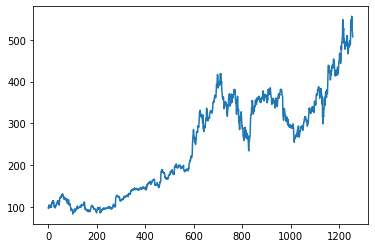

In [8]:
plt.plot(dataset['close'])
plt.show()

In [9]:
df = dataset[['close']]

I have chosen to predict the closing value, you can change it to any other parameter by editing the highighted text in the above cell.

In [10]:
df.head()

,close
0,97.51
1,95.69
2,99.16
3,104.08
4,104.21


In [ ]:
days = 25
df['prediction'] = df[['close']].shift(-days)

Here we create a new feature called prediction where we store the closing values of the stock from a few days ago.

In [12]:
df.tail()

,close,prediction
1252,556.55,NaN
1253,552.84,NaN
1254,525.75,NaN
1255,516.05,NaN
1256,507.02,NaN


The last few entries of "predicted" feature are NaN because we do not have the data beyond our dataset we will simply delete these entries in the next step.

In [13]:
#create the features dataset, convert to numpy, remoxe last x rows
y = np.array(df.drop(['prediction'],1)[:-days])

In [14]:
#create target data
x = np.array(df.drop(['close'],1)[:-days])

In [15]:
#spliting data to 80% training and 20% testing note that the final model will be trained on the complete dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Here we split the training and testing models. This is for an unbiased validation. However for the final prediction we will train our data with the full dataset

In [16]:
#create the model
#decision tree regressor model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Here we defined our "Decision Tree Regressor" and trained it using our training set.

In [17]:
#linear regression model
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Here we defined our "Linear Regressor" and trained it using our training set.

In [18]:
#get the last x rows
x_pred = df.drop(['prediction'],1)[:-days]
x_pred = x_pred[-days:]
x_pred = np.array(x_pred)

In [19]:
#show model tree prediction
tree_reg_pred = tree_reg.predict(x_pred)
lin_reg_pred = lin_reg.predict(x_pred)

Here we predicted our values using our models

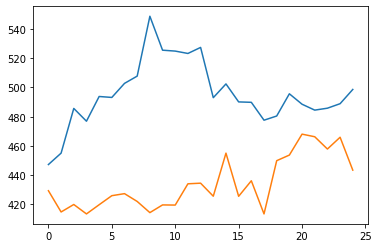

In [20]:
#visualise predictions

plt.plot(y[-days:])
plt.plot(tree_reg_pred)
plt.show()

This is the result of the "Decision Tree Regressor" (in orange) compared to the actual values (in blue).

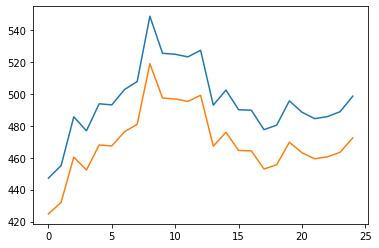

In [21]:

plt.plot(y[-days:])
plt.plot(lin_reg_pred)
plt.show()

This is the result of the "Linear Regressor" (in orange) compared to the actual values (in blue).

In [22]:
#train using full database
lin_reg.fit(x[:-days],y[:-days])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

It is very evident that the "linear regression model" performed better now we will use that to predict our future values.

In [23]:
data = df.drop(['prediction'],1)[-days:]
future_pred = lin_reg.predict(data)

Here we have retrained our model to the entire dataset.

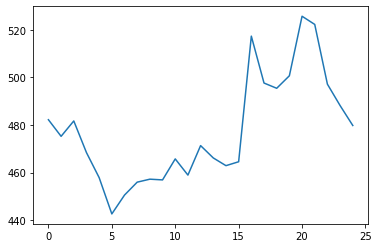

In [24]:
plt.plot(future_pred)

Here is our predicted Data for the next 25 days.

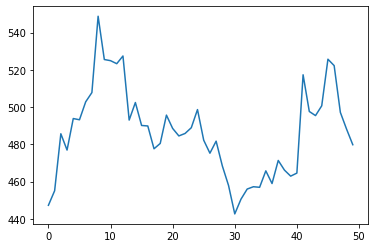

In [25]:
temp = y.tolist()
temp.extend(future_pred)
plt.plot(temp[-50:])
plt.show()

Here is the combined data of the last 25 days and next 25 days plotted together. It predicts we will have a small upward trend for a few days and it will drop therafter.

**Please note that i would not suggest anyone to actually use this data to influence any financial transactions. It is a very basic model and not very reliable. Iam not responsible for any damages whatsoever.**